# Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Multilinear Regression

/content/drive/MyDrive/Statistics with Python/Regression Analysis/Multilinear Regression


In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
# load the data
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [5]:
# DF information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     308 non-null    int64  
 1   carat          308 non-null    float64
 2   colour         308 non-null    object 
 3   clarity        308 non-null    object 
 4   certification  308 non-null    object 
 5   price          308 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.6+ KB


# Exploratory Data Analysis

In [6]:
# Correlation
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.944727
price,0.944727,1.000000


In [7]:
# isolate X and Y
y = df.price
X = df.carat

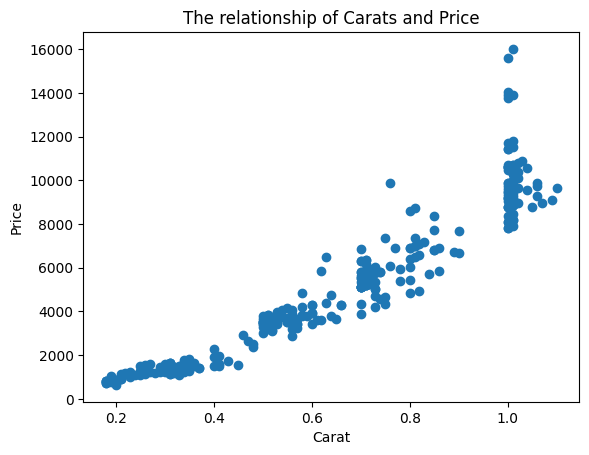

In [8]:
# Scatter plot
plt.scatter(X, y)

#Customizing the graph
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Linear Regression

In [9]:
# Adding a constant
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


In [10]:
# Equation : y = a + b*X + e
model1 = sm.OLS(endog = y, exog = X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          3.04e-150
Time:                        10:58:01   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

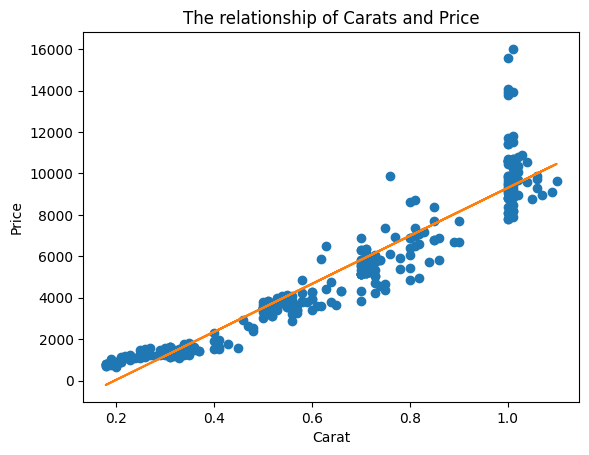

In [11]:
# Plotting the regression curve
X = df.carat

# Plotting the Curve and dots
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)

#Customizing the graph
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Linear Regression with Dummy Variables

In [12]:
# Look at the carat variable
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [13]:
# Create a dummy variable with carat
X_binary = np.where(df.carat > 0.6, 1, 0)
X_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
# Add a constant
X_binary_const = sm.add_constant(X_binary)

In [15]:
# Build the second regression model
model2 = sm.OLS(y, X_binary_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.79e-73
Time:                        10:58:01   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2225.2303    161.442     13.783      0.0

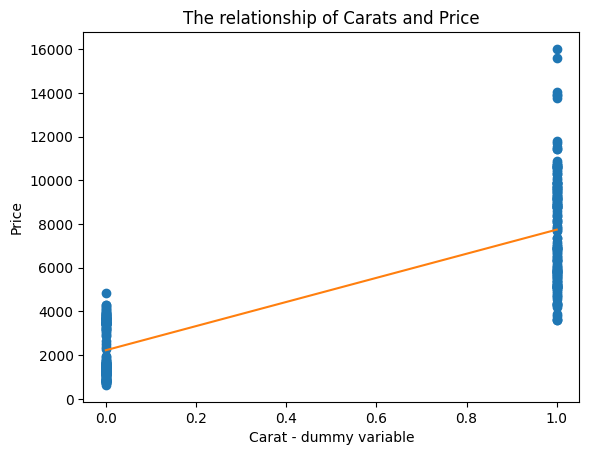

In [16]:
# Plotting the Curve and dots
plt.plot(X_binary, y, 'o')
b, a = np.polyfit(X_binary, y, 1)
plt.plot(X_binary, b * X_binary + a)

#Customizing the graph
plt.xlabel("Carat - dummy variable")
plt.ylabel("Price")
plt.title("The relationship of Carats and Price")

plt.show()

# Exercise: with chatGPT, create a function and that it interprets each variable
# Depending on whether they are continuous or binary

In [34]:
import numpy as np

def interpret_regression(model):
    """
    Interprets the coefficients of a linear regression model fitted using statsmodels.
    The function detects whether a variable is binary or continuous and prints an interpretation accordingly.
    It also provides information about the statistical significance of each variable and omits the intercept.

    Parameters:
    model : statsmodels.regression.linear_model.RegressionResultsWrapper
        The fitted linear regression model.

    Example usage:
        import statsmodels.api as sm
        data = sm.datasets.get_rdataset("Guerry", "HistData").data
        X = sm.add_constant(data[['Lottery', 'Literacy']])
        y = data['Wealth']
        model = sm.OLS(y, X).fit()
        interpret_regression(model)
    """

    # Getting the design matrix (independent variables) used in the regression
    X = model.model.exog
    variables = model.model.exog_names
    params = model.params
    pvalues = model.pvalues

    for variable, coef, pvalue in zip(variables, params, pvalues):
        # Skip the intercept
        if variable == 'const':
            continue

        print('-' * 50)

        # Check if the variable is binary by looking at unique values
        unique_values = np.unique(X[:, variables.index(variable)])
        if len(unique_values) == 2 and all(unique_values == [0, 1]):
            print(f"For the binary variable '{variable}':")
        else:
            print(f"For the continuous variable '{variable}':")

        print(f"  - A change in this variable is associated with a change of {coef:.2f} in the response variable.")

        # Check for statistical significance
        if pvalue < 0.05:
            print("  - This variable is statistically significant at the 0.05 level.")
        else:
            print("  - This variable is not statistically significant at the 0.05 level.")

    print('-' * 50)


In [18]:
# Example usage:
interpret_regression(model1)

For the continuous variable 'const', a one-unit increase is associated with a change of -2298.36 in the response variable.
For the continuous variable 'carat', a one-unit increase is associated with a change of 11598.88 in the response variable.


# Categorical variables

In [19]:
# Data
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [20]:
# count the number of values per unique option
df['colour'].value_counts()

F    82
G    65
H    61
E    44
I    40
D    16
Name: colour, dtype: int64

In [21]:
# Loop through the categoricala variables to count unique options
for cat in list(df.select_dtypes(include = 'object')):
  print(df[cat].value_counts())

F    82
G    65
H    61
E    44
I    40
D    16
Name: colour, dtype: int64
VS1     81
VVS2    78
VS2     53
VVS1    52
IF      44
Name: clarity, dtype: int64
GIA    151
HRD     79
IGI     78
Name: certification, dtype: int64


In [22]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(data = df, drop_first = True)

# Multilinear Regression

In [23]:
#Data
df.head()

,Unnamed: 0,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,1,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
1,2,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
2,3,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
3,4,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
4,5,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


In [24]:
# isolate X and y
y = df.price
X = df.drop(columns = ["price", "Unnamed: 0"])
X.head()

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,0.30,0,0,0,0,0,0,1,0,0,0,0
1,0.30,1,0,0,0,0,1,0,0,0,0,0
2,0.30,0,0,1,0,0,0,0,1,0,0,0
3,0.30,0,0,1,0,0,1,0,0,0,0,0
4,0.31,0,0,0,0,0,1,0,0,0,0,0


In [25]:
# Add a constant to X
X = sm.add_constant(X)

In [29]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1502)

In [32]:
# Multilinear regression
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     484.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.89e-157
Time:                        11:04:33   Log-Likelihood:                -1945.6
No. Observations:                 246   AIC:                             3917.
Df Residuals:                     233   BIC:                             3963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               251.7901    297.74

In [35]:
# Example usage:
interpret_regression(model3)

--------------------------------------------------
For the continuous variable 'carat':
  - A change in this variable is associated with a change of 12722.26 in the response variable.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the binary variable 'colour_E':
  - A change in this variable is associated with a change of -1556.17 in the response variable.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the binary variable 'colour_F':
  - A change in this variable is associated with a change of -1830.43 in the response variable.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the binary variable 'colour_G':
  - A change in this variable is associated with a change of -2261.06 in the response variable.
  - This variable is statistically significant at the 0.05 level.
---

# Accuracy Assessment

In [37]:
# Predict with the regression model
predictions = model3.predict(X_test)

In [47]:
# MEasure the accuracy # RMSE, RSME
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: {mean_absolute_error(y_test, predictions):.0f}")
print(f"RMSE: {mean_squared_error(y_test, predictions, squared = False):.0f}")

MAE: 522
RMSE: 846
